In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from helper_functions import regressor, scatter_compare, data_cleaner, date_to_decimal_year, volcano_rain_frame, data_cleaner

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))


In [1]:
volcanos = {'Wolf': (-91.20, 0.0), 'Fernandina': (-91.33, -0.22), 'Negra, Sierra': (-91.17, -0.83), 'Azul, Cerro': (-91.24, -0.55), 'Bellavista': (-90.33, -.69), 'Ayora': (-90.3,-.74)} # Long/lat pairs must exist in rainfall data
pick = 'Wolf' # Choose a volcano or site to analyze satellite rainfall at (from the above dictionary)
lat_range = .1 # enter desired latitude range
lon_range = .1 # enter desired longitude range
compare_site = ayora  # Choose a gauge site to compare to (currently either ayora or bellavista)
site_name = 'Ayora' # Same choice as for compare_site, but as a string and capitalized
rolling_number = 90 # Number of days to average rainfall over
print_summary = True # Make true if you want to see summary of regression

rain_frame = volcano_rain_frame(rainfall, volcanos, pick, rolling_number, lat_range, lon_range)
compare_frame = data_cleaner(compare_site, rolling_number)



NameError: name 'ayora' is not defined

In [6]:
reg = regressor(rain_frame, volcanos, pick, compare_frame, rolling_number, print_summary)

                            OLS Regression Results                            
Dep. Variable:               roll_two   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                 1.798e+04
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:13:44   Log-Likelihood:                -8515.0
No. Observations:                8254   AIC:                         1.703e+04
Df Residuals:                    8252   BIC:                         1.705e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4059      0.009     47.253      0.0

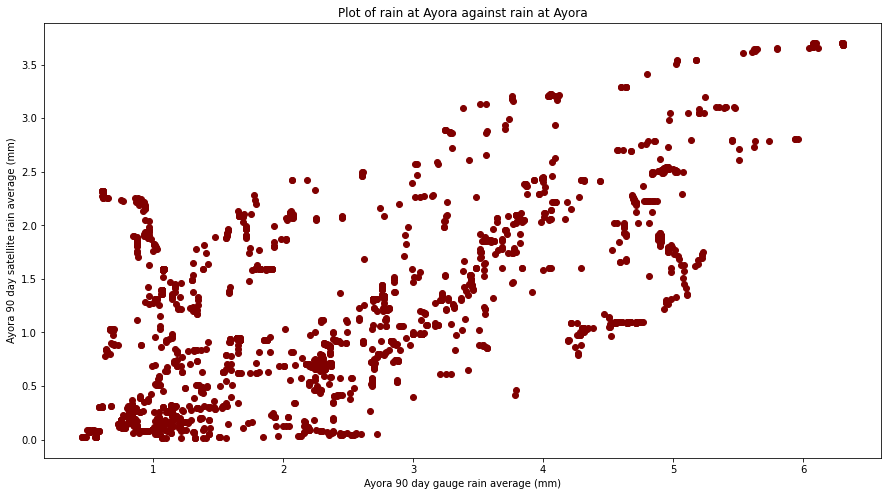

In [7]:
scatter_compare(rain_frame, pick, compare_frame, site_name, rolling_number)